Copy of extract_FOV_and_cutout_galaxies, but for the resolution test.

In [5]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

from glob import glob
from matplotlib.patches import ConnectionPatch

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'

In [4]:
## Loading all the files from the 25 Mpc box and adding them together

machine='coho'

if machine=='chinook':
    directory='/Users/lokhorst/Data/EAGLE/Niagaraoutput/queue'
elif machine=='coho':
    directory='/Users/deblokhorst/Documents/EAGLE/'

directory='/Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps/'
    
def load25Mpc(fname,namestring):
    if os.path.isfile(fname):
        print 'Loading the data: %s'%fname
        data = np.load(fname)['arr_0']
        return data
    else:
        print 'Adding together smaller data files...'
        filelist = glob(directory+namestring)
        print filelist
        print '...adding: '+filelist[0]
        data = np.load(filelist[0])['arr_0']
        for filename in filelist[1:]:
            print '...adding: '+filename
            data = np.log10(10**data + 10**(np.load(filename)['arr_0']))
        np.savez(fname,data)
        return data
    
    return None


In [5]:
halpha376_noSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_1.250000slice_*_noSFR.npz'
halpha376_noSFR_smsl = load25Mpc(halpha376_noSFR_fname,namestring)

halpha376_fromSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_1.250000slice_total__fromSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_1.250000slice_*__fromSFR.npz'
halpha376_fromSFR_smsl = load25Mpc(halpha376_fromSFR_fname,namestring)

halpha376_total_smsl = np.log10(10**halpha376_noSFR_smsl + 10**halpha376_fromSFR_smsl)

Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_376/emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz
Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_376/emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_1.250000slice_total__fromSFR.npz


In [6]:
halpha376_noSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_5.000000slice_total_noSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_5.000000slice_*_noSFR.npz'
halpha376_noSFR = load25Mpc(halpha376_noSFR_fname,namestring)

halpha376_fromSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_5.000000slice_total__fromSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_376/'+\
            'emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_5.000000slice_*__fromSFR.npz'
halpha376_fromSFR = load25Mpc(halpha376_fromSFR_fname,namestring)

halpha376_total = np.log10(10**halpha376_noSFR + 10**halpha376_fromSFR)

Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_376/emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_5.000000slice_total_noSFR.npz
Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_376/emission_halpha_L0025N0376_28_SmAb_C2Sm_8000pix_5.000000slice_total__fromSFR.npz


In [7]:
halpha752ref_noSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_752REF/'+\
            'emission_halpha_L0025N0752_28_SmAb_C2Sm_8000pix_5.000000slice_total_noSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_752REF/'+\
            'emission_halpha_L0025N0752_28_SmAb_C2Sm_8000pix_5.000000slice_*_noSFR.npz'
halpha752ref_noSFR = load25Mpc(halpha752ref_noSFR_fname,namestring)

halpha752ref_fromSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_752REF/'+\
            'emission_halpha_L0025N0752_28_SmAb_C2Sm_8000pix_5.000000slice_total__fromSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_752REF/'+\
            'emission_halpha_L0025N0752_28_SmAb_C2Sm_8000pix_5.000000slice_*__fromSFR.npz'
halpha752ref_fromSFR = load25Mpc(halpha752ref_fromSFR_fname,namestring)

halpha752ref_total = np.log10(10**halpha752ref_noSFR + 10**halpha752ref_fromSFR)

Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_752REF/emission_halpha_L0025N0752_28_SmAb_C2Sm_8000pix_5.000000slice_total_noSFR.npz
Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_752REF/emission_halpha_L0025N0752_28_SmAb_C2Sm_8000pix_5.000000slice_total__fromSFR.npz


In [8]:
halpha752recal_noSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_752RECAL/'+\
            'emission_halpha_L0025N0752RECAL_28_SmAb_C2Sm_8000pix_5.000000slice_total_noSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_752RECAL/'+\
            'emission_halpha_L0025N0752RECAL_28_SmAb_C2Sm_8000pix_5.000000slice_*_noSFR.npz'
halpha752recal_noSFR = load25Mpc(halpha752recal_noSFR_fname,namestring)

halpha752recal_fromSFR_fname = directory+'/niagara_20Jan2019/halpha_25Mpc_752RECAL/'+\
            'emission_halpha_L0025N0752RECAL_28_SmAb_C2Sm_8000pix_5.000000slice_total__fromSFR.npz'
namestring = '/niagara_20Jan2019/halpha_25Mpc_752RECAL/'+\
            'emission_halpha_L0025N0752RECAL_28_SmAb_C2Sm_8000pix_5.000000slice_*__fromSFR.npz'
halpha752recal_fromSFR = load25Mpc(halpha752recal_fromSFR_fname,namestring)

halpha752recal_total = np.log10(10**halpha752recal_noSFR + 10**halpha752recal_fromSFR)

Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_752RECAL/emission_halpha_L0025N0752RECAL_28_SmAb_C2Sm_8000pix_5.000000slice_total_noSFR.npz
Loading the data: /Volumes/Cerulean/EAGLE/EagleProjections/EmissionMaps//niagara_20Jan2019/halpha_25Mpc_752RECAL/emission_halpha_L0025N0752RECAL_28_SmAb_C2Sm_8000pix_5.000000slice_total__fromSFR.npz


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


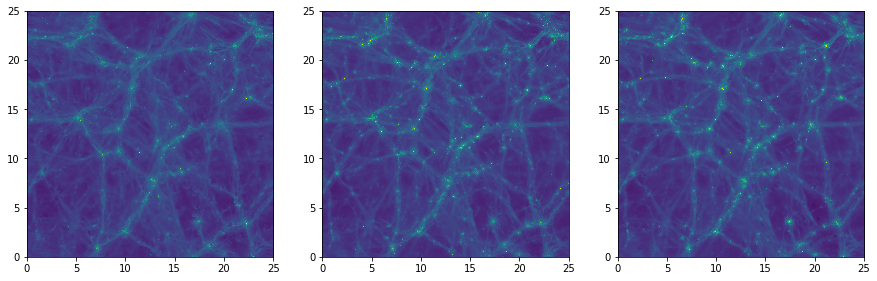

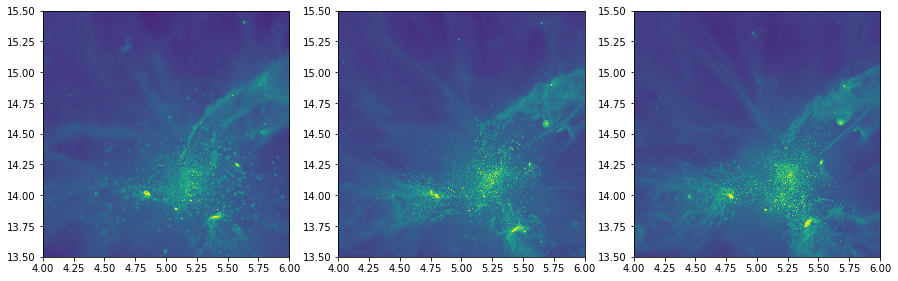

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


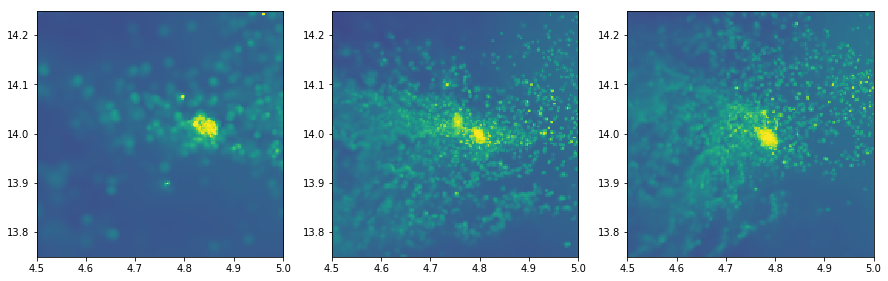

In [9]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
xystarts=[0,0]; xsize,ysize = 25.,25.; Vmin = -4; Vmax = 6; colmap = 'viridis'
ax1.imshow(halpha376_total.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax2.imshow(halpha752recal_total.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax3.imshow(halpha752ref_total.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)

f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
minx,miny,maxx,maxy = 4.,13.5,6.,15.5; boxlength=25.
xystarts_tiny=[minx,miny]; size_tiny=[maxx-minx,maxy-miny]   
xsize = halpha376_total.shape[0]; ysize = halpha376_total.shape[1]

ax1.imshow(halpha376_total[minx*xsize/boxlength:maxx*xsize/boxlength,miny*ysize/boxlength:maxy*ysize/boxlength].T,\
          extent=(xystarts_tiny[0],xystarts_tiny[0]+size_tiny[0],\
                  xystarts_tiny[1],xystarts_tiny[1]+size_tiny[1]),\
          origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax2.imshow(halpha752recal_total[minx*xsize/boxlength:maxx*xsize/boxlength,miny*ysize/boxlength:maxy*ysize/boxlength].T,\
          extent=(xystarts_tiny[0],xystarts_tiny[0]+size_tiny[0],\
                  xystarts_tiny[1],xystarts_tiny[1]+size_tiny[1]),\
          origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax3.imshow(halpha752ref_total[minx*xsize/boxlength:maxx*xsize/boxlength,miny*ysize/boxlength:maxy*ysize/boxlength].T,\
          extent=(xystarts_tiny[0],xystarts_tiny[0]+size_tiny[0],\
                  xystarts_tiny[1],xystarts_tiny[1]+size_tiny[1]),\
          origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)

plt.show()

f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
minx,miny,maxx,maxy = 4.5,13.75,5.,14.25; boxlength=25.
xystarts_tiny=[minx,miny]; size_tiny=[maxx-minx,maxy-miny]   
xsize = halpha376_total.shape[0]; ysize = halpha376_total.shape[1]

ax1.imshow(halpha376_total[minx*xsize/boxlength:maxx*xsize/boxlength,miny*ysize/boxlength:maxy*ysize/boxlength].T,\
          extent=(xystarts_tiny[0],xystarts_tiny[0]+size_tiny[0],\
                  xystarts_tiny[1],xystarts_tiny[1]+size_tiny[1]),\
          origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax2.imshow(halpha752recal_total[minx*xsize/boxlength:maxx*xsize/boxlength,miny*ysize/boxlength:maxy*ysize/boxlength].T,\
          extent=(xystarts_tiny[0],xystarts_tiny[0]+size_tiny[0],\
                  xystarts_tiny[1],xystarts_tiny[1]+size_tiny[1]),\
          origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax3.imshow(halpha752ref_total[minx*xsize/boxlength:maxx*xsize/boxlength,miny*ysize/boxlength:maxy*ysize/boxlength].T,\
          extent=(xystarts_tiny[0],xystarts_tiny[0]+size_tiny[0],\
                  xystarts_tiny[1],xystarts_tiny[1]+size_tiny[1]),\
          origin='lower',cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)

plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


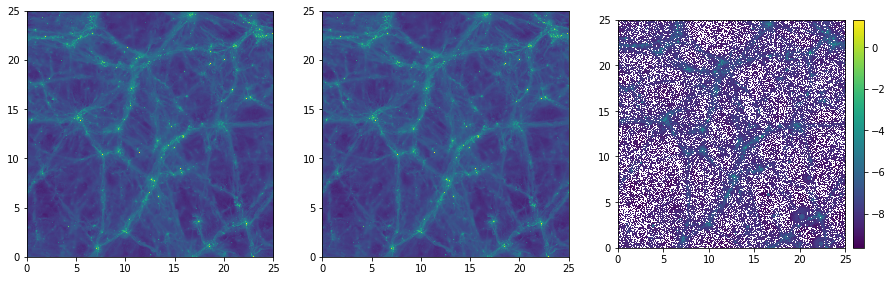

In [10]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
xystarts=[0,0]; xsize,ysize = 25.,25.; Vmin = -4; Vmax = 4; colmap = 'viridis'
ax1.imshow(halpha376_total.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax2.imshow(halpha376_total_smsl.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
diff376 = np.log10(np.abs(10**halpha376_total - 10**halpha376_total_smsl))
img = ax3.imshow(diff376.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = None, vmax=None)

div = axgrid.make_axes_locatable(ax3)
cax = div.append_axes("right",size="5%",pad=0.1)
cbar = plt.colorbar(img, cax=cax,orientation='vertical')

plt.show()

In [11]:
slicewidth = 20.        # initial value
resolution = None      # initial value   # arcsec/pixel
distance   = '100Mpc'  # initial value
data_FOV =None  # from extract_FOV
xystarts =None  # from extract_FOV
size     =None  # from extract_FOV

data_tuple = loaddata(machine=machine, distance=distance, slicewidth=slicewidth)  ### I want this to set the resolution too
data100 = data_tuple[0]
print data_tuple[3]

Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
6.40094057981


In [12]:
print halpha376_total.shape[0]*4
print halpha752ref_total.shape[0]*4
print halpha752recal_total.shape[0]*4

32000
32000
32000


In [13]:
def imreduce(img, factor, log=True, method = 'average'):
    """
    img: 2D image array
    factor: factor by which to reduce the number of array elements along each axis
    log: whether or not the array contains log data values
    """
    if log:
        inimg = 10**img
    else:
        inimg = img
    inshape = np.array(img.shape)

    if np.sum(inshape%factor) != 0:
        print('Output grid must have a integer number of cells: cannot reduce image pixels by a factor %i'%factor)
        return None
    inimg = np.array(np.split(inimg,inshape[0]/factor,axis=0))
    inimg = np.array(np.split(inimg,inshape[1]/factor,axis=-1))

    inimg = np.sum(inimg,axis=-1)
    inimg = np.sum(inimg,axis=-1)
    
    if method == 'average':
        inimg = inimg/np.float(factor**2)
        #outimg = np.average(inimg[])
    if log:
        inimg = np.log10(inimg)
    return inimg.T

## reduce the resolution
halpha376_total_sm = imreduce(halpha376_total,2)
halpha752ref_total_sm = imreduce(halpha752ref_total,2)
halpha752recal_total_sm = imreduce(halpha752recal_total,2)

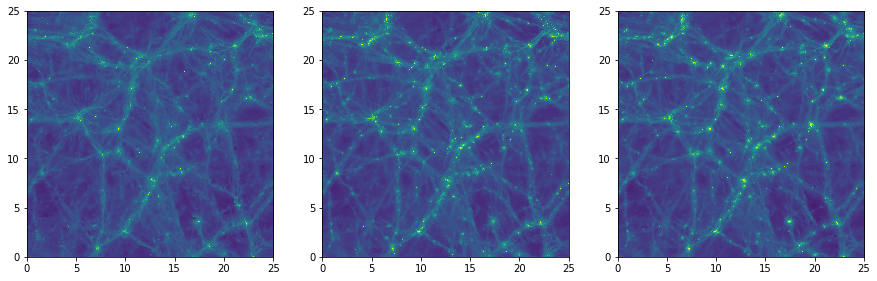

In [14]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
xystarts=[0,0]; xsize,ysize = 25.,25.; Vmin = -4; Vmax = 4; colmap = 'viridis'
ax1.imshow(halpha376_total_sm.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax2.imshow(halpha752recal_total_sm.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
ax3.imshow(halpha752ref_total_sm.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
          cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)
plt.show()

In [15]:
verbose = True
import eagleSqlTools as sql

def databasequery(mySim = ('RefL0100N1504',100.),zmin=0,zmax=20):
    con   = sql.connect("dlokhorst",password="mxdPB54Y")  
    myQuery = "SELECT \
            SH.StarFormationRate as SFR, \
            SH.CentreOfPotential_x as sh_x,\
            SH.CentreOfPotential_y as sh_y,\
            SH.CentreOfPotential_z as sh_z,\
            SH.MassType_Star as mstar,\
            SH.MassType_DM as mdark,\
            FOF.Group_R_Crit200 as R200,\
            FOF.Group_M_Crit200 as M200, \
            FOF.Group_R_TopHat200 as RTopHat, \
            FOF.Group_M_TopHat200 as MTopHat, \
            SH.HalfMassProjRad_Star, \
            SH.HalfMassProjRad_Gas, \
            FOF.GroupMass as fof_mass\
        FROM   \
            %s_Subhalo as SH, \
            %s_FOF as FOF  \
        WHERE   \
            SH.MassType_Star > 1.0e8     \
            and SH.SnapNum = 28 \
            and SH.CentreOfPotential_z >= %s \
            and SH.CentreOfPotential_z <= %s \
            and FOF.SnapNum = SH.SnapNum \
            and FOF.GroupID = SH.GroupID"%(mySim[0],mySim[0],zmin,zmax)

    if verbose:
        print myQuery
    
    myData = sql.execute_query(con,myQuery)

    #sfr  = myData['SFR'][:]
    # Location of the galaxy
    xgal = myData['sh_x'][:]                  # cMpc
    ygal = myData['sh_y'][:]                  # cMpc
    zgal = myData['sh_z'][:]                  # cMpc
    # Stellar Mass of the galaxy
    mgal = myData['mstar'][:]                 # M_solar
    mdark = myData['mdark'][:]                # M_solar
    # Effective Radii
    rhgas = myData['HalfMassProjRad_Gas'][:]  # pkpc
    rhstar= myData['HalfMassProjRad_Star'][:] # pkpc
    # Virial Radii and Halo Masses
    R200 = myData['R200'][:]                  # pkpc
    M200 = myData['M200'][:]                  # M_solar
    RTopHat = myData['RTopHat'][:]            # pkpc
    MTopHat = myData['MTopHat'][:]            # M_solar

    print 'DONE.'
    return xgal,ygal,zgal,mgal,mdark,rhgas,rhstar,R200,M200,RTopHat,MTopHat

#xgal,ygal,zgal,mgal,rhgas,rhstar,R200,M200,RTopHat,MTopHat = databasequery()

In [ ]:
## After that scare of not being able to execute the SQL search, I'm going to save this info to a text file.
with open("extract_FOV_and_cutout_galaxies_25Mpc_SQL_galaxy_info.txt", "w") as text_file:
    text_file.write('## xgal,ygal,zgal,mgal,rhgas,rhstar,R200,M200,RTopHat,MTopHat \n')
    for ind in range(len(xgal)):
        text_file.write('%f,%f,%f,%f,%f,%f,%f,%f,%f,%f \n'%
                        (xgal[ind],ygal[ind],zgal[ind],mgal[ind],\
                         rhgas[ind],rhstar[ind],R200[ind],M200[ind],RTopHat[ind],MTopHat[ind]))

In [16]:
resolution = 6.4

Mpcperpix = 0.477/1000.*(1.+0.0235) * 6.4
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution         # at 100 Mpc from us
kpcperpix = 0.477/1000.*(1.+0.0235) * resolution * 1000. # at 100 Mpc from us

print Mpcperpix*1000.

3.1245408


In [17]:
class SimGalaxies:
    """A simple class containing information about galaxies in the EAGLE galaxy catalogue for a specific simulation run"""

    def __init__(self, simnum, simsize, resolution = 6.4):
        self.data = []
        self.num  = simnum
        self.size = simsize
        
        # Load data into dictionaries
        self.data8to9,self.data8up,self.data910,self.data1011,self.data11up,self.data9up,self.data10up,self.data95up = self.read_catalogue(resolution)
        
    def read_catalogue(self,resolution):
        xgal,ygal,zgal,mgal,mdark,rhgas,rhstar,R200,M200,RTopHat,MTopHat = databasequery(mySim = (self.num,self.size))
        
        Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution
        # Condition (use bitwise "&" and not boolean "and")
        condition_10andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                         (rhgas*5. > (Mpcperpix*1000.)) &
                                         (mgal > 10**10) 
                                    )
        condition_9to10_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                       (rhgas*5. > (Mpcperpix*1000.)) &
                                       (mgal > 10**9) & (mgal <= 10**10)
                                  )
        condition_8to9_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                       (rhgas*5. > (Mpcperpix*1000.)) &
                                       (mgal > 10**8) & (mgal <= 10**9)
                                  )

        condition_8andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                         (rhgas*5. > (Mpcperpix*1000.)) &
                                         (mgal > 10**8) 
                                       )
                                        
        condition_9andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                         (rhgas*5. > (Mpcperpix*1000.)) &
                                         (mgal > 10**9) 
                                    )
                                        
        condition_95andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                         (rhgas*5. > (Mpcperpix*1000.)) &
                                         (mgal > 2.*10**9) 
                                    )
        condition_10to11_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                       (rhgas*5. > (Mpcperpix*1000.)) &
                                       (mgal > 10**10) & (mgal <= 10**11)
                                  )
        condition_11andup = np.array( (mgal > 10**11) & (rhstar*5. > (Mpcperpix*1000.)) & 
                                     (rhgas*5. > (Mpcperpix*1000.)) )
        
       # condition_10andup_all = np.array( (mgal > 10**10) )
       # condition_9andup_all = np.array(   (mgal > 10**9) )
       # condition_8andup_all = np.array(   (mgal > 10**8) )
       # condition_9to10_all  = np.array(  (mgal > 10**9) & (mgal <= 10**10)  )
       # condition_10to11_all = np.array(  (mgal > 10**10) & (mgal <= 10**11)  )
       # condition_11andup    = np.array(  (mgal > 10**11)  )

        def makeselection(condition=condition_11andup):
            ii = np.array(np.where(condition)[0])
            dict_ii = {}
            dict_ii['xgal']    = np.array(xgal[ii])
            dict_ii['ygal']    = np.array(ygal[ii])
            dict_ii['mgal']    = np.array(mgal[ii])
            dict_ii['rhstar']  = np.array(rhstar[ii])
            dict_ii['R200']    = np.array(R200[ii])
            dict_ii['M200']    = np.array(M200[ii])
            dict_ii['RTopHat'] = np.array(RTopHat[ii])
            dict_ii['MTopHat'] = np.array(MTopHat[ii])
            dict_ii['mdark']  = np.array(mdark[ii])
            dict_ii['rhgas']  = np.array(rhgas[ii])
            return dict_ii

                                        
        dict_8andup_all = makeselection(condition=condition_8andup_all)               
        print 'Number of galaxies above 10^8 Msolar is: \t %s'%len(dict_8andup_all['ygal'])

        dict_9andup_all = makeselection(condition=condition_9andup_all)
        print 'Number of galaxies above 10^9 Msolar is: \t %s'%len(dict_9andup_all['ygal'])

        dict_95andup_all = makeselection(condition=condition_95andup_all)
        print 'Number of galaxies above 5*10^9 Msolar is: \t %s'%len(dict_95andup_all['ygal'])
        
        dict_10andup_all = makeselection(condition=condition_10andup_all)
        print 'Number of galaxies above 10^10 Msolar is: \t %s'%len(dict_10andup_all['ygal'])

        dict_11andup_all = makeselection(condition=condition_11andup)
        print 'Number of galaxies above 10^11 Msolar is: \t %s'%len(dict_11andup_all['ygal'])

        dict_8to9_all = makeselection(condition=condition_8to9_all)
        print 'Number of galaxies between 10^8 and 10^9 Msolar is: \t %s'%len(dict_8to9_all['ygal'])

        dict_9to10_all = makeselection(condition=condition_9to10_all)
        print 'Number of galaxies between 10^9 and 10^10 Msolar is: \t %s'%len(dict_9to10_all['ygal'])
        
        dict_10to11_all = makeselection(condition=condition_10to11_all)
        print 'Number of galaxies between 10^10 and 10^11 Msolar is: \t %s'%len(dict_10to11_all['ygal'])

        ## Check that they add up correctly:
        if (len(dict_9to10_all['RTopHat'])+len(dict_10to11_all['RTopHat'])+ len(dict_11andup_all['RTopHat']))==len(dict_9andup_all['ygal']):
            print 'TEST PASSED'
        else:
            print 'TEST FAILED'
            
        return dict_8to9_all,dict_8andup_all,dict_9to10_all,dict_10to11_all,dict_11andup_all,dict_9andup_all,dict_10andup_all,dict_95andup_all

    
    def read_catalogue2(self,resolution):
        xgal,ygal,zgal,mgal,mdark,rhgas,rhstar,R200,M200,RTopHat,MTopHat = databasequery(mySim = (self.num,self.size))
        
        Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution
        # Condition (use bitwise "&" and not boolean "and")
        condition_10andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                         (rhgas*5. > (Mpcperpix*1000.)) &
                                         (mdark > 10**10) 
                                    )
        condition_9to10_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                       (rhgas*5. > (Mpcperpix*1000.)) &
                                       (mdark > 10**9) & (mdark <= 10**10)
                                  )

        condition_9andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                         (rhgas*5. > (Mpcperpix*1000.)) &
                                         (mdark > 10**9) 
                                    )
        condition_95andup_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                         (rhgas*5. > (Mpcperpix*1000.)) &
                                         (mdark > 2.*10**9) 
                                    )
        condition_10to11_all = np.array(    (rhstar*5. > (Mpcperpix*1000.)) &
                                       (rhgas*5. > (Mpcperpix*1000.)) &
                                       (mdark > 10**10) & (mdark <= 10**11)
                                  )
        condition_11andup = np.array( (mdark > 10**11.2) & (rhstar*5. > (Mpcperpix*1000.)) & 
                                     (rhgas*5. > (Mpcperpix*1000.)) )
        
        #condition_10andup_all = np.array( (mgal > 10**10) )
        #condition_9andup_all = np.array(   (mgal > 10**9) )
        #condition_9to10_all  = np.array(  (mgal > 10**9) & (mgal <= 10**10)  )
        #condition_10to11_all = np.array(  (mgal > 10**10) & (mgal <= 10**11)  )
        #condition_11andup    = np.array(  (mgal > 10**11)  )

        def makeselection(condition=condition_11andup):
            ii = np.array(np.where(condition)[0])
            dict_ii = {}
            dict_ii['xgal']    = np.array(xgal[ii])
            dict_ii['ygal']    = np.array(ygal[ii])
            dict_ii['mgal']    = np.array(mgal[ii])
            dict_ii['rhstar']  = np.array(rhstar[ii])
            dict_ii['R200']    = np.array(R200[ii])
            dict_ii['M200']    = np.array(M200[ii])
            dict_ii['RTopHat'] = np.array(RTopHat[ii])
            dict_ii['MTopHat'] = np.array(MTopHat[ii])
            dict_ii['mdark']  = np.array(mdark[ii])
            return dict_ii

        dict_9andup_all = makeselection(condition=condition_9andup_all)
        print 'Number of galaxies WITH DM above 10^9 Msolar is: \t %s'%len(dict_9andup_all['ygal'])

        dict_95andup_all = makeselection(condition=condition_95andup_all)
        print 'Number of galaxies WITH DM above 5*10^9 Msolar is: \t %s'%len(dict_95andup_all['ygal'])
        
        dict_10andup_all = makeselection(condition=condition_10andup_all)
        print 'Number of galaxies WITH DM above 10^10 Msolar is: \t %s'%len(dict_10andup_all['ygal'])

        dict_11andup_all = makeselection(condition=condition_11andup)
        print 'Number of galaxies WITH DM above 10^11 Msolar is: \t %s'%len(dict_11andup_all['ygal'])

        dict_9to10_all = makeselection(condition=condition_9to10_all)
        print 'Number of galaxies WITH DM between 10^9 and 10^10 Msolar is: \t %s'%len(dict_9to10_all['ygal'])
        
        dict_10to11_all = makeselection(condition=condition_10to11_all)
        print 'Number of galaxies WITH DM between 10^10 and 10^11 Msolar is: \t %s'%len(dict_10to11_all['ygal'])

        ## Check that they add up correctly:
        if (len(dict_9to10_all['RTopHat'])+len(dict_10to11_all['RTopHat'])+ len(dict_11andup_all['RTopHat']))==len(dict_9andup_all['ygal']):
            print 'TEST PASSED'
        else:
            print 'TEST FAILED'
            
        return dict_9to10_all,dict_10to11_all,dict_11andup_all,dict_9andup_all,dict_10andup_all,dict_95andup_all


In [18]:
ref376 = SimGalaxies('RefL0025N0376',25.)
ref752 = SimGalaxies('RefL0025N0752',25.)
recal752 = SimGalaxies('RecalL0025N0752',25.)
ref1504 = SimGalaxies('RefL0100N1504',100.)

SELECT             SH.StarFormationRate as SFR,             SH.CentreOfPotential_x as sh_x,            SH.CentreOfPotential_y as sh_y,            SH.CentreOfPotential_z as sh_z,            SH.MassType_Star as mstar,            SH.MassType_DM as mdark,            FOF.Group_R_Crit200 as R200,            FOF.Group_M_Crit200 as M200,             FOF.Group_R_TopHat200 as RTopHat,             FOF.Group_M_TopHat200 as MTopHat,             SH.HalfMassProjRad_Star,             SH.HalfMassProjRad_Gas,             FOF.GroupMass as fof_mass        FROM               RefL0025N0376_Subhalo as SH,             RefL0025N0376_FOF as FOF          WHERE               SH.MassType_Star > 1.0e8                 and SH.SnapNum = 28             and SH.CentreOfPotential_z >= 0             and SH.CentreOfPotential_z <= 20             and FOF.SnapNum = SH.SnapNum             and FOF.GroupID = SH.GroupID
DONE.
Number of galaxies above 10^8 Msolar is: 	 509
Number of galaxies above 10^9 Msolar is: 	 188
Number of ga

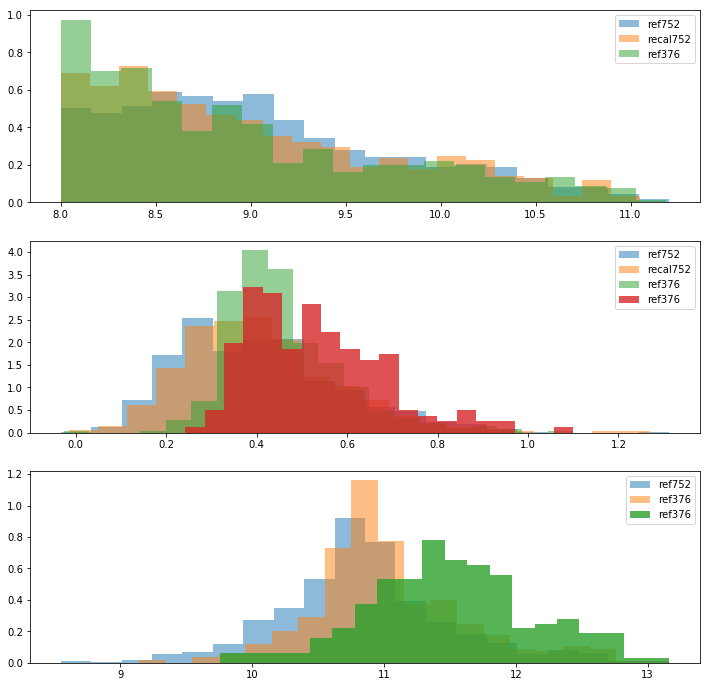

In [19]:
#plt.hist(np.log10(ref1504.data9up['mgal']),normed=True,alpha=0.5)
f,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,12))
normed=True
ax1.hist(np.log10(ref752.data8up['mgal']),normed=normed,alpha=0.5,label='ref752',bins=20)
ax1.hist(np.log10(recal752.data8up['mgal']),normed=normed,alpha=0.5,label='recal752',bins=20)
ax1.hist(np.log10(ref376.data8up['mgal']),normed=normed,alpha=0.5,label='ref376',bins=20)

ax2.hist(np.log10(ref752.data8up['rhstar']),normed=normed,alpha=0.5,label='ref752',bins=20)
ax2.hist(np.log10(recal752.data8up['rhstar']),normed=normed,alpha=0.5,label='recal752',bins=20)
ax2.hist(np.log10(ref376.data8up['rhstar']),normed=normed,alpha=0.5,label='ref376',bins=20)
ax2.hist(np.log10(ref376.data9up['rhstar']),normed=normed,alpha=0.8,label='ref376',bins=20)

ax3.hist(np.log10(ref752.data8up['mdark']),normed=normed,alpha=0.5,label='ref752',bins=20)
#ax3.hist(np.log10(recal752.data8up['mdark']),normed=normed,alpha=0.5,label='recal752',bins=20)
ax3.hist(np.log10(ref376.data8up['mdark']),normed=normed,alpha=0.5,label='ref376',bins=20)
ax3.hist(np.log10(ref376.data9up['mdark']),normed=normed,alpha=0.8,label='ref376',bins=20)

for ax in [ax1,ax2,ax3]:
    ax.legend()

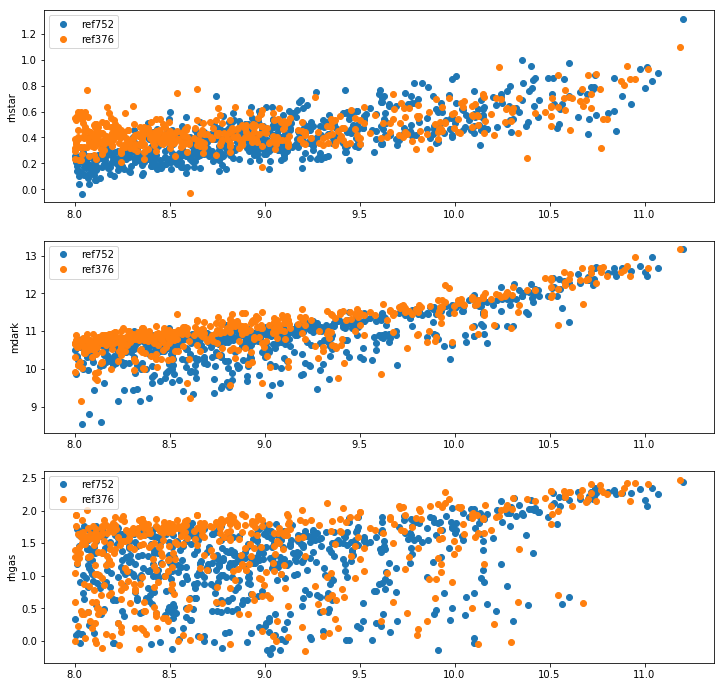

In [20]:
#plt.hist(np.log10(ref1504.data9up['mgal']),normed=True,alpha=0.5)
f,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(12,12))
normed=True
ax1.plot(np.log10(ref752.data8up['mgal']),np.log10(ref752.data8up['rhstar']),'o',label='ref752')
ax1.plot(np.log10(ref376.data8up['mgal']),np.log10(ref376.data8up['rhstar']),'o',label='ref376')
ax1.set_ylabel('rhstar')

ax2.plot(np.log10(ref752.data8up['mgal']),np.log10(ref752.data8up['mdark']),'o',label='ref752')
ax2.plot(np.log10(ref376.data8up['mgal']),np.log10(ref376.data8up['mdark']),'o',label='ref376')
ax2.set_ylabel('mdark')

ax3.plot(np.log10(ref752.data8up['mgal']),np.log10(ref752.data8up['rhgas']),'o',label='ref752')
ax3.plot(np.log10(ref376.data8up['mgal']),np.log10(ref376.data8up['rhgas']),'o',label='ref376')
ax3.set_ylabel('rhgas')

for ax in [ax1,ax2,ax3]:
    ax.legend()

In [21]:
print len(ref752.data910['xgal'])
print len(recal752.data910['xgal'])
print len(ref376.data910['xgal'])
print len(ref1504.data910['xgal'])

223
156
121
1341


In [22]:
def radial_profile(data, center):
    data = 10**data
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())  ## radial profile before dividing by num of data points
    nr = np.bincount(r.ravel())                  ## num of data points
    radialprofile = tbin / nr
    return np.log10(radialprofile )

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


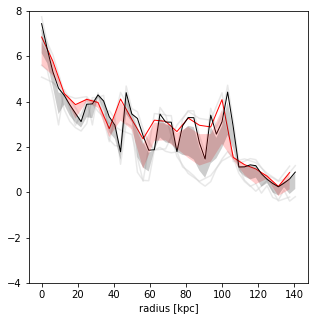

In [24]:
boxsize = 0.2

def Halphaprofileplot(data,xgal,ygal,boxsize,rhstar=None,linewidth=1,color='black',linestyle='-',
                          ax1=None,label=None,method='median',title = '',boxlength = 100.,plotgals=False):
    
    if ax1 is None:
        f, (ax1) = plt.subplots(1, 1,figsize=(5,5))
    ax1.set_title(title)
    ax1.set_ylim(-4,8)
    ax1.set_xlabel('radius [kpc]')
    
    azprofiles=[]; radius=[]; length = len(ygal); title=title
#    kpcperpix = 0.477/1000.*(1.+0.0235) * resolution * 1000. # at 100 Mpc from us
#    radius = np.arange(46) * kpcperpix
    
    edgecasecount = 0
    for j in range(length):
        minx,miny,maxx,maxy = xgal[j]-boxsize/2.,ygal[j]-boxsize/2.,xgal[j]+boxsize/2.,ygal[j]+boxsize/2.
        xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
        
       # print minx,maxx,miny,maxy
       # print xystarts_tiny,size_tiny
        xsize = data.shape[0]; ysize = data.shape[1]
        data_tiny=data[minx*xsize/boxlength:maxx*xsize/boxlength,miny*ysize/boxlength:maxy*ysize/boxlength]

       # print data_tiny.shape
        
        if plotgals:
            f, (ax) = plt.subplots(1, 1,figsize=(5,5))
            xystarts=xystarts_tiny; xsize,ysize = boxsize,boxsize; Vmin = -4; Vmax = 4; colmap = 'viridis'
            ax.imshow(data_tiny.T,extent=(xystarts[0],xystarts[0]+xsize,xystarts[1],xystarts[1]+ysize),origin='lower',\
                        cmap=cm.get_cmap(colmap),interpolation='nearest', vmin = Vmin, vmax=Vmax)

        center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
        rad = radial_profile(data_tiny, center)
        
       # print center
       # print len(rad)
       # print ''
        kpcperpix = boxlength/data.shape[0] * 1000.
        numpix_expected = int(np.sqrt(2*data_tiny.shape[0]**2)/2)+1
        radius = np.arange(numpix_expected) * kpcperpix
        
      #  print kpcperpix
      #  print expected
        
        if len(rad)==numpix_expected:
            azprofiles.append(rad)
            if method=='none':
                ax1.plot(radius,rad)
            elif method!='justmedian':
                ax1.plot(radius,rad,color='lightgrey',zorder=1,alpha=0.5)
           # if rhstar is not None:
           #     ax1.plot([rhstar[j],rhstar[j]],[-4,8],color='peachpuff',zorder=1,alpha=0.3)
        else:
            'catch edge cases'
            #print "The length of the profile (x,y=%s,%s) is not correct, length: %s"%\
            #            (minx+boxsize/2,miny+boxsize/2,len(rad))
            edgecasecount = edgecasecount+1

    if edgecasecount>0:
        print "NOTE:   There were %s edge cases thrown out (out of total %s galaxies)"%(edgecasecount,length)
    
    azprofiles = np.array(azprofiles)
    
    if method=='average':
        meanprofile = np.log10(np.mean(10**(azprofiles), axis=0))
        sigmaprofile = np.log10(np.std(10**(azprofiles), axis=0))
        lowerr  = np.log10( 10**meanprofile - (10**sigmaprofile) ) 
        higherr = np.log10( 10**meanprofile + (10**sigmaprofile) ) 
        ax1.plot(radius,lowerr,color=color,linestyle='--')
        ax1.plot(radius,higherr,color=color,linestyle='--')
        ax1.plot(radius,meanprofile,color=color,linestyle='-') 
        return meanprofile,lowerr,higherr
    elif 'median' in method:
        medianprofile = np.log10(np.median(10**(azprofiles), axis=0))
        p25profile = np.percentile(azprofiles, 25, axis=0)
        p75profile = np.percentile(azprofiles, 75, axis=0)
        ax1.plot(radius,medianprofile,color=color,linestyle=linestyle,label=label,zorder=3,linewidth=linewidth)
      #  ax1.plot(radius,p25profile,color=color,linestyle='--',label='25 percentile') 
      #  ax1.plot(radius,p75profile,color=color,linestyle='--',label='75 percentile') 
        if method!='justmedian':
            ax1.fill_between(radius,p25profile, p75profile, facecolor =color,alpha=0.2,zorder=4)
        if rhstar is not None:
            ax1.plot([np.median(rhstar),np.median(rhstar)],[-4,8],color='orange',linewidth=2,zorder=2,alpha=0.5)
        return medianprofile,p25profile,p75profile
    else:
        print 'No method of statistic-ing the data selected.  Returning no profiles, watch out!'
    
    
## Comparing different resolutions of the same simulation

f, (ax1) = plt.subplots(1, 1,figsize=(5,5))

Halphaprofileplot(halpha376_total_sm,ref376.data11up['xgal'],ref376.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha376_total,ref376.data11up['xgal'],ref376.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='black');


NOTE:   There were 1 edge cases thrown out (out of total 65 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 65 galaxies)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


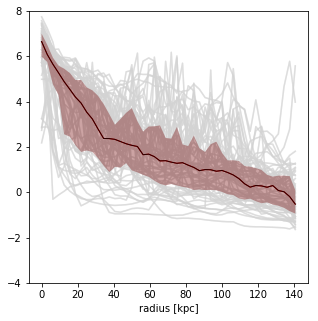

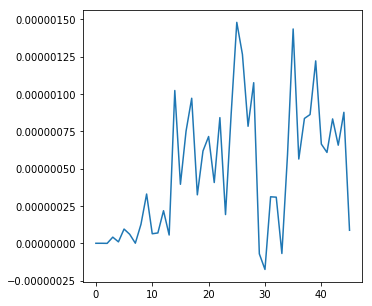

In [25]:
## Comparing different slice splitting of the same simulation

f, (ax1) = plt.subplots(1, 1,figsize=(5,5))

median_smsl,p25_smsl,p75_smsl = Halphaprofileplot(halpha376_total_smsl,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
median,p25,p75 = Halphaprofileplot(halpha376_total,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='black');


f, (ax1) = plt.subplots(1, 1,figsize=(5,5))

ax1.plot(median_smsl-median)



/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NOTE:   There were 1 edge cases thrown out (out of total 65 galaxies)
NOTE:   There were 2 edge cases thrown out (out of total 85 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 76 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 515 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 65 galaxies)
NOTE:   There were 2 edge cases thrown out (out of total 85 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 76 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 515 galaxies)


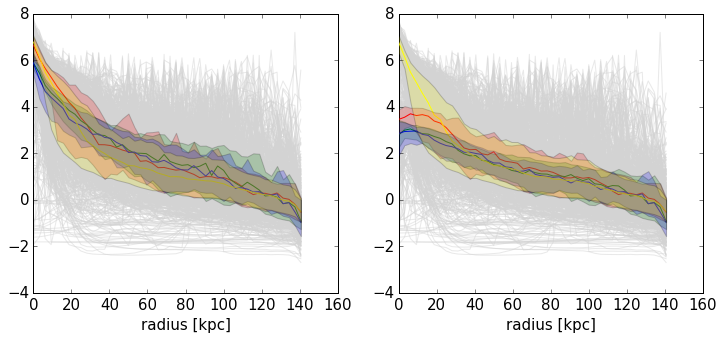

In [259]:
# just for fun -- seeing if can scale the SB down in the higher res runs to match

boxsize = 0.2

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total-np.log10(8.),ref752.data1011['xgal'],ref752.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total-np.log10(8.),recal752.data1011['xgal'],recal752.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR-np.log10(8.),ref752.data1011['xgal'],ref752.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR-np.log10(8.),recal752.data1011['xgal'],recal752.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 100.,color='yellow');


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NOTE:   There were 1 edge cases thrown out (out of total 67 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 240 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 168 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 67 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 240 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 168 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 69 galaxies)
NOTE:   There were 6 edge cases thrown out (out of total 215 galaxies)
NOTE:   There were 3 edge cases thrown out (out of total 167 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 145 galaxies)
NOTE:   There were 6 edge cases thrown out (out of total 215 galaxies)
NOTE:   There were 3 edge cases thrown out (out of total 167 galaxies)
NOTE:   There were 6 edge cases thrown out (out of total 202 galaxies)
NOTE:   There were 14 edge cases thrown out (out of total 769 galaxies)
NOTE:   

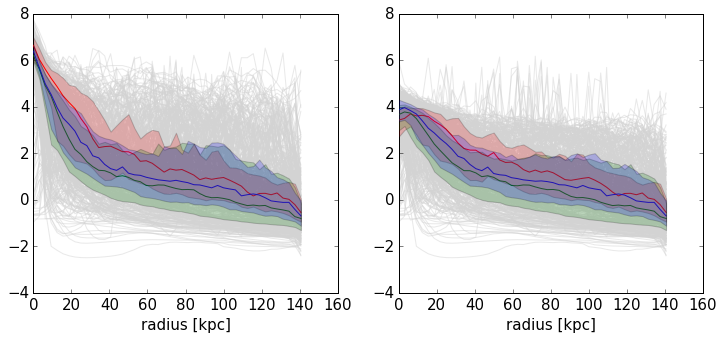

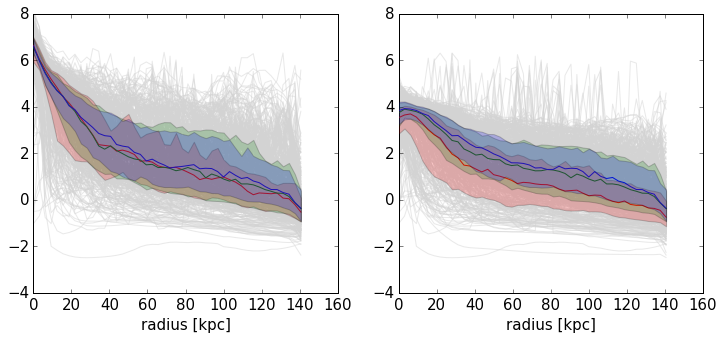

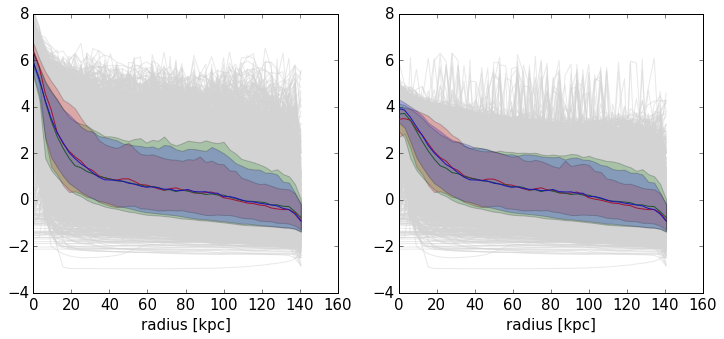

In [374]:
# testing mass limit selections to see if that introduces some bias

boxsize = 0.2

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total,ref752.data910['xgal'],ref752.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total,recal752.data910['xgal'],recal752.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
#Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR,ref752.data910['xgal'],ref752.data910['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR,recal752.data910['xgal'],recal752.data910['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');
#Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax2,\
#                      boxlength = 100.,color='yellow');

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data10up['xgal'],ref376.data10up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total,ref752.data95up['xgal'],ref752.data95up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total,recal752.data95up['xgal'],recal752.data95up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
#Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data95up['xgal'],ref376.data95up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR,ref752.data95up['xgal'],ref752.data95up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR,recal752.data95up['xgal'],recal752.data95up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');
#Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax2,\
#                      boxlength = 100.,color='yellow');


f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data9up['xgal'],ref376.data9up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total,ref752.data8up['xgal'],ref752.data8up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total,recal752.data8up['xgal'],recal752.data8up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
#Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data9up['xgal'],ref376.data9up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR,ref752.data8up['xgal'],ref752.data8up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR,recal752.data8up['xgal'],recal752.data8up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');
#Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax2,\
#                      boxlength = 100.,color='yellow');

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NOTE:   There were 1 edge cases thrown out (out of total 65 galaxies)
NOTE:   There were 2 edge cases thrown out (out of total 85 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 76 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 515 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 65 galaxies)
NOTE:   There were 2 edge cases thrown out (out of total 85 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 76 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 515 galaxies)
NOTE:   There were 5 edge cases thrown out (out of total 121 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 223 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 156 galaxies)
NOTE:   There were 7 edge cases thrown out (out of total 1341 galaxies)
NOTE:   There were 5 edge cases thrown out (out of total 121 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 223 galaxies)
NOTE:   The

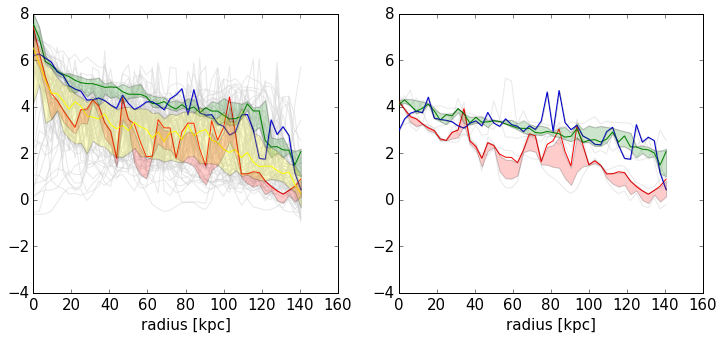

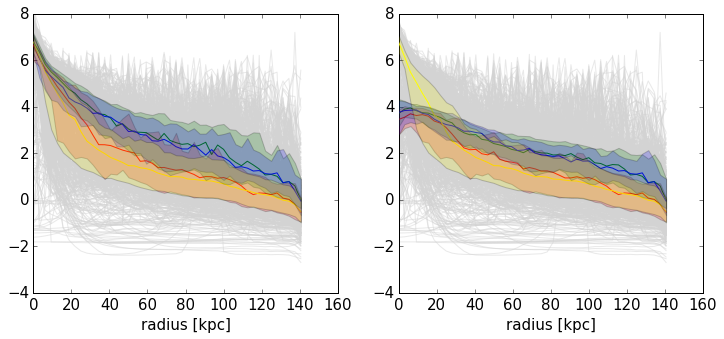

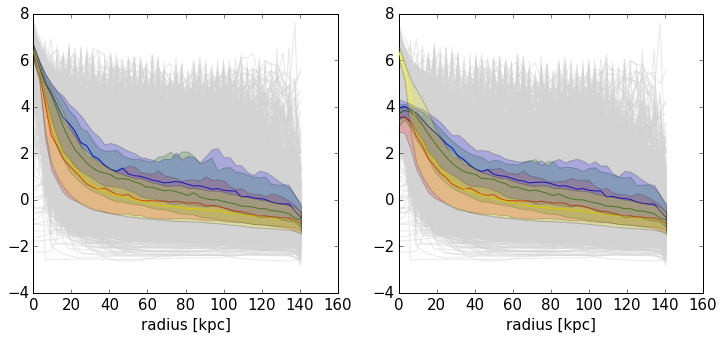

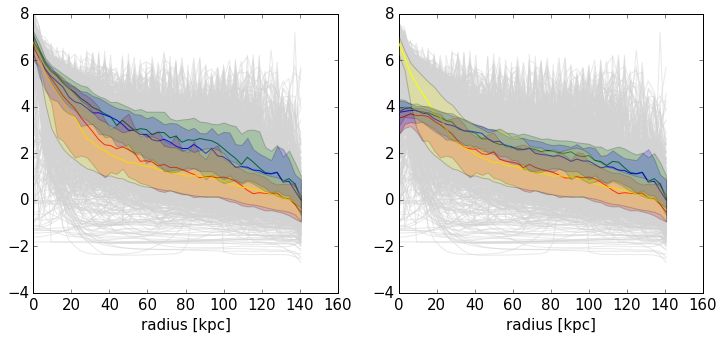

In [258]:
boxsize = 0.2

#-np.log10(8.)

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data11up['xgal'],ref376.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total,ref752.data11up['xgal'],ref752.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total,recal752.data11up['xgal'],recal752.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data11up['xgal'],ref1504.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data11up['xgal'],ref376.data11up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR,ref752.data11up['xgal'],ref752.data11up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR,recal752.data11up['xgal'],recal752.data11up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total,ref752.data1011['xgal'],ref752.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total,recal752.data1011['xgal'],recal752.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR,ref752.data1011['xgal'],ref752.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR,recal752.data1011['xgal'],recal752.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax2,\
                      boxlength = 100.,color='yellow');

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data910['xgal'],ref376.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total,ref752.data910['xgal'],ref752.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total,recal752.data910['xgal'],recal752.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data910['xgal'],ref1504.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data910['xgal'],ref376.data910['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR,ref752.data910['xgal'],ref752.data910['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR,recal752.data910['xgal'],recal752.data910['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data910['xgal'],ref1504.data910['ygal'],boxsize,ax1=ax2,\
                      boxlength = 100.,color='yellow');

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,5))
Halphaprofileplot(halpha376_total,ref376.data10up['xgal'],ref376.data10up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_total,ref752.data10up['xgal'],ref752.data10up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_total,recal752.data10up['xgal'],recal752.data10up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data10up['xgal'],ref1504.data10up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 100.,color='yellow');

Halphaprofileplot(halpha376_noSFR,ref376.data10up['xgal'],ref376.data10up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='red');
Halphaprofileplot(halpha752ref_noSFR,ref752.data10up['xgal'],ref752.data10up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='green');
Halphaprofileplot(halpha752recal_noSFR,recal752.data10up['xgal'],recal752.data10up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 25.,color='blue');
Halphaprofileplot(data100,ref1504.data10up['xgal'],ref1504.data10up['ygal'],boxsize,ax1=ax2,\
                      boxlength = 100.,color='yellow');


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NOTE:   There were 5 edge cases thrown out (out of total 121 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 223 galaxies)
NOTE:   There were 4 edge cases thrown out (out of total 156 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 65 galaxies)
NOTE:   There were 2 edge cases thrown out (out of total 85 galaxies)
NOTE:   There were 1 edge cases thrown out (out of total 76 galaxies)
NOTE:   There were 6 edge cases thrown out (out of total 188 galaxies)
NOTE:   There were 6 edge cases thrown out (out of total 313 galaxies)
NOTE:   There were 5 edge cases thrown out (out of total 233 galaxies)
NOTE:   There were 11 edge cases thrown out (out of total 1916 galaxies)


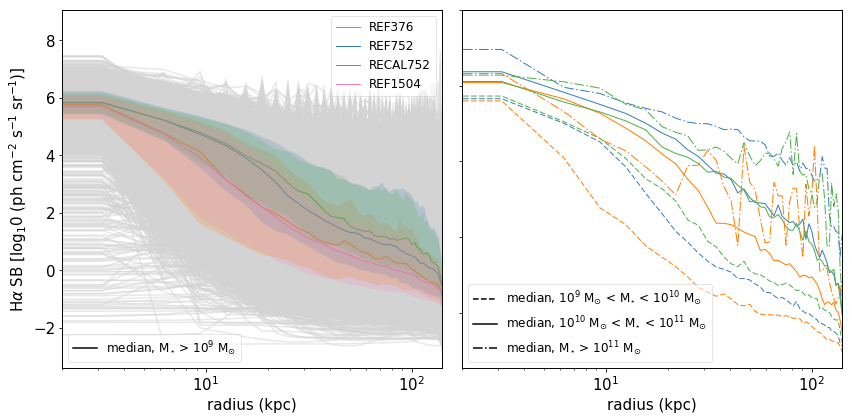

In [39]:
f, (ax3,ax1) = plt.subplots(1,2, figsize=(12,6))

### first plot

#Halphaprofileplot(halpha376_total,ref376.data8to9['xgal'],ref376.data8to9['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 25.,color='red',method='justmedian',label='REF376');
#Halphaprofileplot(halpha752ref_total,ref752.data8to9['xgal'],ref752.data8to9['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 25.,color='green',method='justmedian',label='REF752');
#Halphaprofileplot(halpha752recal_total,recal752.data8to9['xgal'],recal752.data8to9['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 25.,color='blue',method='justmedian',label='RECAL752');
#Halphaprofileplot(data100,ref1504.data8to9['xgal'],ref1504.data8to9['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 100.,color='yellow',method='justmedian',label='REF1504');

CB_color_cycle = [ '#ff7f00', '#377eb8','#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

Halphaprofileplot(halpha376_total,ref376.data910['xgal'],ref376.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[0],linestyle='--',method='justmedian',label='REF376');
Halphaprofileplot(halpha752ref_total,ref752.data910['xgal'],ref752.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[1],linestyle='--',method='justmedian',label='REF752');
Halphaprofileplot(halpha752recal_total,recal752.data910['xgal'],recal752.data910['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[2],linestyle='--',method='justmedian',label='RECAL752');
#Halphaprofileplot(data100,ref1504.data910['xgal'],ref1504.data910['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 100.,color=CB_color_cycle[3],linestyle='--',method='justmedian',label='REF1504');

Halphaprofileplot(halpha376_total,ref376.data1011['xgal'],ref376.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[0],linestyle='-',method='justmedian');
Halphaprofileplot(halpha752ref_total,ref752.data1011['xgal'],ref752.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[1],linestyle='-',method='justmedian');
Halphaprofileplot(halpha752recal_total,recal752.data1011['xgal'],recal752.data1011['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[2],linestyle='-',method='justmedian');
#Halphaprofileplot(data100,ref1504.data1011['xgal'],ref1504.data1011['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 100.,color=CB_color_cycle[3],linestyle='-',method='justmedian');

Halphaprofileplot(halpha376_total,ref376.data11up['xgal'],ref376.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[0],linestyle='-.',method='justmedian');
Halphaprofileplot(halpha752ref_total,ref752.data11up['xgal'],ref752.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[1],linestyle='-.',method='justmedian');
Halphaprofileplot(halpha752recal_total,recal752.data11up['xgal'],recal752.data11up['ygal'],boxsize,ax1=ax1,\
                      boxlength = 25.,color=CB_color_cycle[2],linestyle='-.',method='justmedian');
#Halphaprofileplot(data100,ref1504.data11up['xgal'],ref1504.data11up['ygal'],boxsize,ax1=ax1,\
#                      boxlength = 100.,color=CB_color_cycle[3],linestyle='-.',method='justmedian');

### second plot

Halphaprofileplot(halpha376_total,ref376.data9up['xgal'],ref376.data9up['ygal'],boxsize,ax1=ax3,\
                      boxlength = 25.,color=CB_color_cycle[0],label='REF376');
Halphaprofileplot(halpha752ref_total,ref752.data9up['xgal'],ref752.data9up['ygal'],boxsize,ax1=ax3,\
                      boxlength = 25.,color=CB_color_cycle[1],label='REF752');
Halphaprofileplot(halpha752recal_total,recal752.data9up['xgal'],recal752.data9up['ygal'],boxsize,ax1=ax3,\
                      boxlength = 25.,color=CB_color_cycle[2],label='RECAL752');
Halphaprofileplot(data100,ref1504.data9up['xgal'],ref1504.data9up['ygal'],boxsize,ax1=ax3,\
                      boxlength = 100.,color=CB_color_cycle[3],label='REF1504');

### making them pretty

ax3.legend(loc=1, framealpha=0.5)
ax3.set_ylabel(r'H$\alpha$ SB [log$_10$ (ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$)]')

for ax in [ax1,ax3]:
    ax.set_xlim(2.,140)
    ax.set_ylim(-2.,8)

ax2 = ax1.twiny()
ax4 = ax3.twiny()
for ax in [ax2,ax4]:
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_xticks([])
for ax in [ax1]:
    ax.set_yticklabels([])
    ax.set_ylabel('')
    
title1 = r'median, 10$^9$ M$_{\odot}$ < M$_{\star}$ < 10$^{10}$ M$_{\odot}$'
title2 = r'median, 10$^{10}$ M$_{\odot}$ < M$_{\star}$ < 10$^{11}$ M$_{\odot}$'
title3 = r'median, M$_{\star}$ > 10$^{11}$ M$_{\odot}$'
title4 = r'median, M$_{\star}$ > 10$^{9}$ M$_{\odot}$'
ax2.plot(0,0,'k--',label=title1)
ax2.plot(0,0,'k-',label=title2)
ax2.plot(0,0,'k-.',label=title3)
ax2.legend(loc=3, framealpha=0.5)
ax4.plot(0,0,'k-',label=title4)
ax4.legend(loc=3, framealpha=0.5)

loglog = True
if loglog:
    for ax in [ax1,ax3]:
        ax.set_xscale('log')
    for ax in [ax1,ax3]:
        ax.set_xlabel(r'radius (kpc)')

f.subplots_adjust( wspace = 0, top=.95)
plt.tight_layout()

plt.savefig('extract_FOV_and_cutout_galaxies_25Mpc.pdf')

In [28]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
linewidth=2
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(16,6))

median_9to10,p25_9to10,p75_9to10=Halphaprofileplot(data,dict_9to10_all['xgal'],dict_9to10_all['ygal'],boxsize,\
                                                   ax1=ax1,color='green',label='median',linewidth=linewidth)
#plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax1,only9=True,linewidth=linewidth)

median_10to11,p25_10to11,p75_10to11=Halphaprofileplot(data,dict_10to11_all['xgal'],dict_10to11_all['ygal'],boxsize,\
                                                      ax1=ax2,color='blue',label = 'median',linewidth=linewidth)
#plotindividualprofiles(data,xgal_9andup,ygal_9andup,boxsize,ax1=ax2,only10=True,linewidth=linewidth)

median_11andup,p25_11andup,p75_11andup=Halphaprofileplot(data,dict_11andup_all['xgal'],dict_11andup_all['ygal'],\
                                                         boxsize,ax1=ax3,\
                                                         color='orange',label = 'median',linewidth=linewidth)

title1 = r'10$^9$ M$_{\odot}$ < M$_{\star}$ < 10$^{10}$ M$_{\odot}$'
title2 = r'10$^{10}$ M$_{\odot}$ < M$_{\star}$ < 10$^{11}$ M$_{\odot}$'
title3 = r'M$_{\star}$ > 10$^{11}$ M$_{\odot}$'

for ax,title in zip([ax1,ax2,ax3],[title1,title2,title3]):
    ax.grid(linestyle=':')
    ax.legend(loc=1, framealpha=0.5)
    ax.set_xlim(2.,140)
    ax.text(130,-3.5,title,horizontalalignment='right',fontsize=16)
for ax in [ax2,ax3]:
    ax.set_yticklabels([])
    ax.set_ylabel('')

ax1.set_ylabel(r'H$\alpha$ SB [log (ph cm$^{-2}$ s$^{-1}$ sr$^{-1}$)]')

ax5 = ax1.twiny()
ax6 = ax2.twiny()
ax7 = ax3.twiny()

for ax,R200 in zip([ax5,ax6,ax7],[dict_9to10_all['R200'],dict_10to11_all['R200'],dict_11andup_all['R200']]):
    ax.set_xlabel('R/R$_{200}$')
    ax.set_xlim(2./np.median(R200),140./np.median(R200))

addCGMlimits = False
if addCGMlimits:
    reff_lw = 1.5
    print 'The inner CGM for the first plot is: %s'%np.median(rhstar_9to10_all)
    print 'The inner CGM for the second plot is: %s'%np.median(rhstar_10to11_all)
    print 'The inner CGM for the third plot is: %s'%np.median(rhstar_11andup_all)
    ax1.plot([np.median(rhstar_9to10_all),np.median(rhstar_9to10_all)],[-4,8],color='black',linewidth=reff_lw,zorder=2,alpha=0.5)
    ax2.plot([np.median(rhstar_10to11_all),np.median(rhstar_10to11_all)],[-4,8],color='black',linewidth=reff_lw,zorder=2,alpha=0.5)
    ax3.plot([np.median(rhstar_11andup_all),np.median(rhstar_11andup_all)],[-4,8],color='black',linewidth=reff_lw,zorder=2,alpha=0.5)

    print 5*np.median(rhstar_9to10_all)
    print 5*np.median(rhstar_10to11_all)
    print 5*np.median(rhstar_11andup_all)

    ax1.plot([5*np.median(rhstar_9to10_all),5*np.median(rhstar_9to10_all)],[-4,8],color='red',linewidth=reff_lw,zorder=2,alpha=0.5)
    ax2.plot([5*np.median(rhstar_10to11_all),5*np.median(rhstar_10to11_all)],[-4,8],color='red',linewidth=reff_lw,zorder=2,alpha=0.5)
    ax3.plot([5*np.median(rhstar_11andup_all),5*np.median(rhstar_11andup_all)],[-4,8],color='red',linewidth=reff_lw,zorder=2,alpha=0.5)

loglog = True
if loglog:
    for ax in [ax1,ax2,ax3,ax5,ax6,ax7]:
        ax.set_xscale('log')
    ax5.set_xticks([0.05,0.1,0.5])
    ax5.set_xticklabels([0.05,0.1,0.5])
    ax6.set_xticks([0.01,0.05,0.1,0.5])
    ax6.set_xticklabels([0.01,0.05,0.1,0.5])
    ax7.set_xticks([0.01,0.05,0.1])
    ax7.set_xticklabels([0.01,0.05,0.1])
    for ax in [ax1,ax2,ax3]:
        ax.set_xlabel(r'radius (kpc)')
    for ax in [ax5,ax6,ax7]:
        ax.set_xlabel(r'R/R$_{200}$')
        
#print np.median(R200_9to10_all)
#print np.median(RTopHat_9to10_all)

#print np.median(R200_10to11_all)
#print np.median(RTopHat_10to11_all)

#print np.median(R200_11andup_all)
#print np.median(RTopHat_11andup_all)

        
#SB_cgs = 10**-22 *u.erg / u.arcsec**2 / u.cm**2 / u.s
def getSB_ph(SB_cgs,photon_wavelength=656.3e-9*u.m):
    return SB_cgs * photon_wavelength/(const.h.to('erg s') * const.c.to('m/s')) * (206265.*u.arcsec)**2/u.sr
def getSB_cgs(SB_ph,photon_wavelength=656.3e-9*u.m):
    return SB_ph / (photon_wavelength/(const.h.to('erg s') * const.c.to('m/s')) * (206265.*u.arcsec)**2/u.sr)
print getSB_ph(10**-19 *u.erg / u.arcsec**2 / u.cm**2 / u.s)

ax8 = ax3.twinx()
ax8.set_ylabel(r'H$\alpha$ SB [log (erg cm$^{-2}$ s$^{-1}$ arcsec$^{-2}$)]')
ax8.set_ylim(np.log10(getSB_cgs(10**-4).value),np.log10(getSB_cgs(10**8).value))
print getSB_cgs(10**-4),getSB_cgs(10**8)

addSBlimits = False
if addSBlimits:
    # Read in the surface brightness limits from a text file: They were calculated in SignalToNoise_azimuthalaveraging_limits
    #ff = open('../SignalToNoise_azimuthalaveraging_limits_sigma1_5.txt','r')
    ff = open('../SignalToNoise_azimuthalaveraging_limits_sigma3.txt','r')
    readradius = []
    readSB = []
    for line in ff:
        if line[0]!='#'and len(line)>5:
            tmp = line.split()
            readradius.append(tmp[0])
            readSB.append(tmp[1])
    ff.close()
    readradius = np.array(readradius,'d')
    readSB = np.array(readSB,'d')

    #ax1.plot(readradius,np.log10(readSB),'k--',alpha=0.5)
    #ax2.plot(readradius,np.log10(readSB),'k--',alpha=0.5)
    #ax3.plot(readradius,np.log10(readSB),'k--',alpha=0.5)##

    ax1.fill_between(readradius,np.log10(readSB),y2 = -4,alpha=0.1,zorder = 2)
    ax2.fill_between(readradius,np.log10(readSB),y2 = -4,alpha=0.1,zorder = 2)
    ax3.fill_between(readradius,np.log10(readSB),y2 = -4,alpha=0.1,zorder = 2)

fig.subplots_adjust( wspace = 0, top=.95)
plt.tight_layout()

if loglog:
    printlog = '_log'
else:
    printlog = ''
    
plt.savefig('extract_FOV_and_cutout_galaxies_25Mpc%s.png'%printlog)

Compare SB distributions

32000
32000
32000


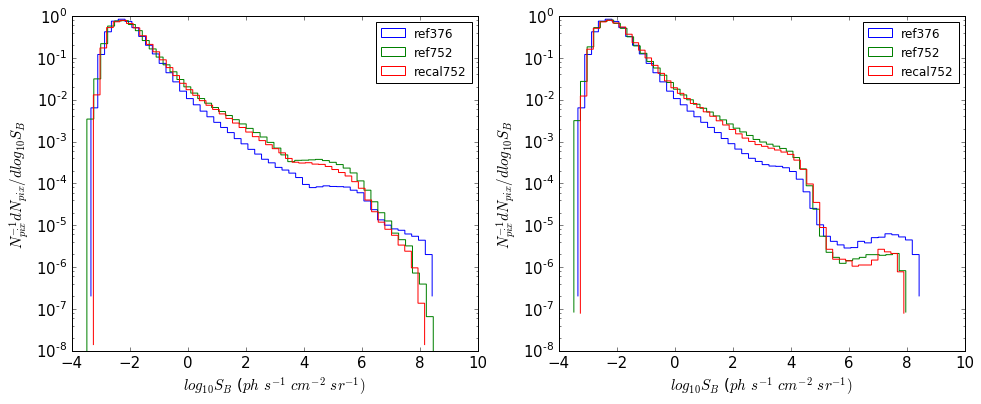

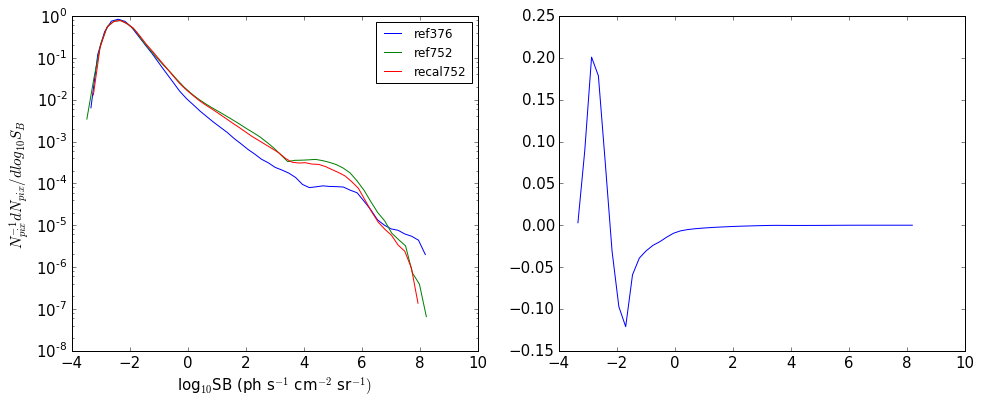

In [253]:
print halpha376_total.shape[0]*4
print halpha752ref_total.shape[0]*4
print halpha752recal_total.shape[0]*4

f, (ax1,ax2) = plt.subplots(1, 2,figsize=(16,6))
hist_376 = ax1.hist(halpha376_total.flatten(),bins=50,log='True',normed='True',histtype='step',label='ref376')
hist_752ref = ax1.hist(halpha752ref_total.flatten(),bins=50,log='True',normed='True',histtype='step',label='ref752')
hist_752recal = ax1.hist(halpha752recal_total.flatten(),bins=50,log='True',normed='True',histtype='step',label='recal752')
ax1.set_ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
ax1.set_xlabel(r'$log_{10}S_{B}$ ($ph$ $s^{-1}$ $cm^{-2}$ $sr^{-1})$')
ax1.legend()

ax2.hist(halpha376_noSFR.flatten(),bins=50,log='True',normed='True',histtype='step',label='ref376')
ax2.hist(halpha752ref_noSFR.flatten(),bins=50,log='True',normed='True',histtype='step',label='ref752')
ax2.hist(halpha752recal_noSFR.flatten(),bins=50,log='True',normed='True',histtype='step',label='recal752')
ax2.set_ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
ax2.set_xlabel(r'$log_{10}S_{B}$ ($ph$ $s^{-1}$ $cm^{-2}$ $sr^{-1})$')
ax2.legend()


f, (ax2,ax1) = plt.subplots(1, 2,figsize=(16,6))

#diff=ax1.bar(hist_376[1][:-1], 
#             height=(hist_752ref[0]-hist_376[0]), edgecolor='black', 
#             linewidth=1.2, color='red',width = 0.25)#,log='True') 
#ax1.set_ylim(-10000,10000)

ax2.plot(hist_376[1][:-1],hist_376[0],label='ref376')
ax2.plot(hist_752ref[1][:-1],hist_752ref[0],label='ref752')
ax2.plot(hist_752recal[1][:-1],hist_752recal[0],label='recal752')
ax2.set_yscale('log')
ax2.set_ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
ax2.set_xlabel(r'log$_{10}$SB (ph s$^{-1}$ cm$^{-2}$ sr$^{-1})$')
ax2.legend()

ax1.plot(hist_376[1][:-1],hist_376[0]-hist_752ref[0])

plt.show()

This actually looks pretty similar to the comparisons in the appendix of Bertone+ 2012 -- basically showing that the results converge.

376 has more particles with the lowest surface brightness.  These would be particles out in filaments.
752 has more particles with intermediate surface brightnesses.  These would be particles falling in clumps.
-->  752 has more particles in clumps at intermediate mass, rather than being spread out into filaments.

32000
32000
32000


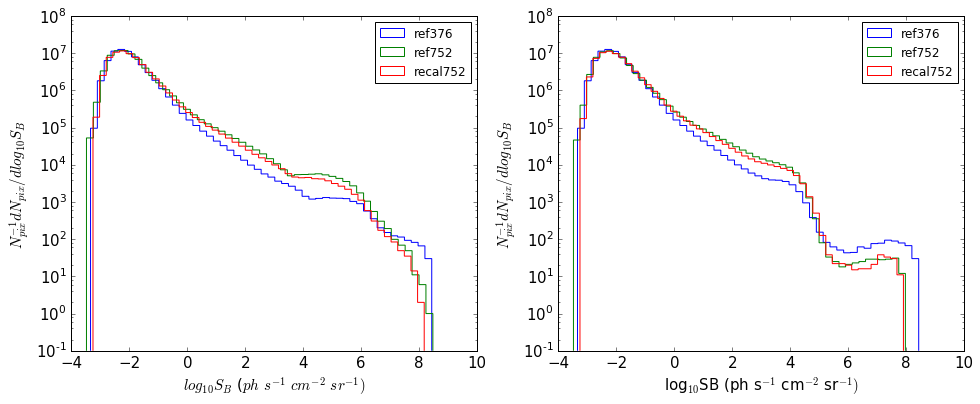

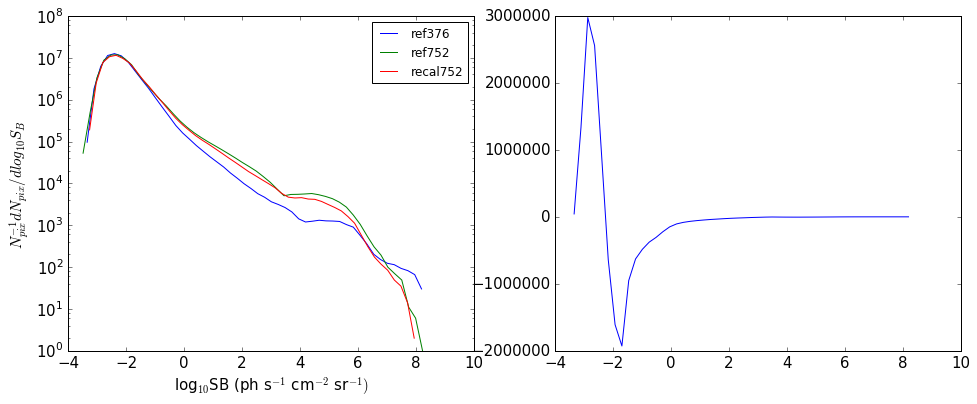

In [252]:
print halpha376_total.shape[0]*4
print halpha752ref_total.shape[0]*4
print halpha752recal_total.shape[0]*4
#-np.log10(8.)
normed='False'
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(16,6))
hist_376 = ax1.hist(halpha376_total.flatten(),bins=50,log='True',histtype='step',label='ref376')
hist_752ref = ax1.hist(halpha752ref_total.flatten(),bins=50,log='True',histtype='step',label='ref752')
hist_752recal = ax1.hist(halpha752recal_total.flatten(),bins=50,log='True',histtype='step',label='recal752')
ax1.set_ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
ax1.set_xlabel(r'$log_{10}S_{B}$ ($ph$ $s^{-1}$ $cm^{-2}$ $sr^{-1})$')
ax1.legend()

#ax1.set_ylim(10**6,10**8)

ax2.hist(halpha376_noSFR.flatten(),bins=50,log='True',histtype='step',label='ref376')
ax2.hist(halpha752ref_noSFR.flatten(),bins=50,log='True',histtype='step',label='ref752')
ax2.hist(halpha752recal_noSFR.flatten(),bins=50,log='True',histtype='step',label='recal752')
ax2.set_ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
ax2.set_xlabel(r'log$_{10}$SB (ph s$^{-1}$ cm$^{-2}$ sr$^{-1})$')
ax2.legend()

plt.show()
